
#Álgebra Lineal Computacional
##Trabajo Práctico Nº2

Hecho por: Flor Fontana y Valentina Durán

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

###Ejercicio 1
Implementamos la función que aplique N pasos del método del descenso.


El método del descenso lo utilizamos para resolver un sistema lineal Ax = b, con A definida positiva.

In [ ]:
def metodo_descenso(A,b,x0,N):
  x = x0
  e = np.array([])

  for i in range(1, N):
    r = b - A@x
    lmbd = (np.transpose(r)@r)/(np.transpose(r)@A@r)
    x = x + lmbd*r
    e = np.append(e,np.linalg.norm(b - A@x, 2))

  return(x,e) #Devolvemos la x que en cada iteración converge a la x sistema lineal y la lista de errores de cada iteración



### Ejercicio 2
Aplicamos el método al ejemplo.


In [ ]:
M = np.random.rand(10,10)
A = np.transpose(M)@M + np.identity(10)
b = np.random.rand(10)
x0 = np.random.rand(10)
N = 20

res = metodo_descenso(A,b,x0,N)
print(res)



(array([ 0.06199297,  0.4724198 ,  0.15389572,  0.35447399, -0.07043224,
       -0.1317052 , -0.18771418, -0.12365658, -0.01247882, -0.23042978]), array([1.74976579, 0.71123563, 0.45850309, 0.48169503, 0.32356164,
       0.35504763, 0.24484878, 0.27551507, 0.19258327, 0.21940281,
       0.15434955, 0.17688609, 0.12482751, 0.14347383, 0.10141179,
       0.11674281, 0.08259169, 0.09516357, 0.06736181]))


Graficamos los errores en función de la iteración:

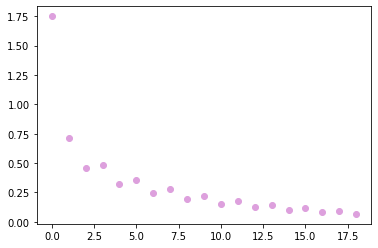

In [ ]:
plt.plot(res[1],"o", color = 'plum')

Notamos cómo rápidamente los errores convergen a 0.

###Ejercicio 3
Implementamos la función que da como resultado aplicar un paso de la modificación del método Gram-Schmidt.

In [ ]:
def Gram_Schmidt(d,v,A):
  u = v
  for i in range(1, len(d)):
    u = u - ((np.transpose(v)@A@d[i])/(np.transpose(d[i])@A@d[i]))*d[i]
  return(u)

###Ejercicio 4

Implementamos la función del método del gradiente conjugado

In [ ]:
def grad_conjugado(A,b,x0,n):
  x = x0
  r = b - A@x
  lmbd = (np.transpose(r)@r)/(np.transpose(r)@A@r)
  x = x + lmbd*r
  d = np.array([r]) #Gram Schmidt para el primer vector queda igual
  e = np.array([np.linalg.norm(b - A@x, 2)]) #agregamos el primer error manualmente

  for i in range(1, n):
    r = b - A@x
    r_onda = Gram_Schmidt(d,r,A)
    lmbd = (np.transpose(r_onda)@r)/(np.transpose(r_onda)@A@r_onda)
    x = x + lmbd*r_onda
    d = np.concatenate((d, [r]), axis = 0)
    e = np.append(e,np.linalg.norm(b - A@x, 2))

  return(x, e) #Devolvemos la x que en cada iteración converge a la x sistema lineal y la lista de errores de cada iteración



###Ejercicio 5


(array([ 0.07124501,  0.48027555,  0.15612843,  0.35974819, -0.071804  ,
       -0.12459734, -0.1920506 , -0.13012651, -0.01851521, -0.23637057]), array([1.74976579, 0.71123563, 0.47017286, 0.1941365 , 0.12901899,
       0.13135391, 0.16745648, 0.16818493, 0.10573903, 0.08759237,
       0.08191987, 0.09369556, 0.08029447, 0.0739291 , 0.10898096,
       0.05638733, 0.07558008, 0.03800098, 0.03794807, 0.0440066 ]))


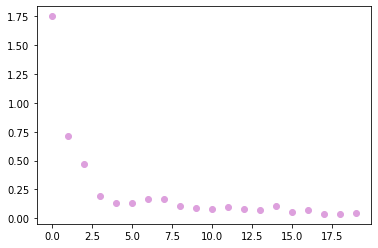

In [ ]:
res2 = grad_conjugado(A,b,x0,N)
print(res2)
plt.plot(res2[1],"o", color = 'plum')

Luego de hacer varias pruebas consideramos que el método más apropiado para resolver un sistema de ecuaciones lineales es el de gradiente conjugado. Esto se debe a que luego de probar con varias matrices A, notamos tanto en los gráficos como en el vector, que los errores en cada iteración convergen más rápido a 0.

Claramente esto depende de con qué A trabajemos, ya que al tener elementos aleatorios, cada vez que trabajamos con una A nueva irán cambiando los errores. A veces converge más rápido a 0 y a veces más lento. Sin embargo, siempre notamos que el método del gradiente conjugado es más adecuado.